In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
import pandas as pd
# Load the dataset
dataframe = pd.read_csv('Petrol CSV w Date.csv')
dataframe

,date,consumption
0,1980,542254.000
1,1981,589017.000
2,1982,644907.000
3,1983,690214.000
4,1984,754725.000
5,1985,783807.000
6,1986,822735.000
7,1987,874255.000
8,1988,940358.000
9,1989,989211.000


In [3]:
import pandas as pd

# Load the dataset
dataframe = pd.read_csv('Petrol CSV w Date.csv')

# Drop the 'date' column
dataframe = dataframe.drop(columns=['date'])

# Display the DataFrame
print(dataframe)

    consumption
0    542254.000
1    589017.000
2    644907.000
3    690214.000
4    754725.000
5    783807.000
6    822735.000
7    874255.000
8    940358.000
9    989211.000
10  1069662.000
11  1066161.000
12  1116531.000
13  1187036.000
14  1180097.000
15  1157853.000
16  1220068.000
17  1276282.000
18  1300373.000
19  1245994.000
20  1259601.000
21  1103762.000
22  1092482.000
23  1098342.000
24  1243675.000
25  1330538.000
26  1187530.000
27  1147886.000
28  1459570.000
29  1527953.000
30  1935678.000
31  2257122.000
32  2764843.000
33  3353134.000
34  3877984.000
35  4754295.000
36  5800350.000
37  6737560.000
38  7511280.000
39  7685985.000
40  7510363.858
41  8515259.000
42  9158934.000
43  7564345.000


<Figure size 2000x600 with 0 Axes>

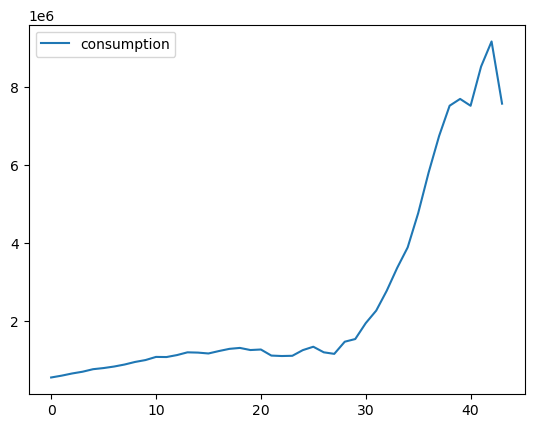

<Figure size 2000x600 with 0 Axes>

In [4]:
dataframe.plot()
plt.figure(figsize=(20, 6))

In [5]:
dataset = dataframe.values
dataset = dataset.astype('float32')
df=dataset[:150]

In [6]:
len(df)

44

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

In [8]:
# Specify the number of observations for training and test sets
train_size = 31  # Replace with your desired number of training observations
test_size = len(df) - train_size

# Split the dataset based on the specified sizes
train = dataset[:train_size, :]
test = dataset[train_size:, :]

print(len(train), len(test))

31 13


In [9]:
## convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape, trainY.shape)

(29, 1) (29,)


In [11]:
print(train.shape, test.shape)

(31, 1) (13, 1)


In [12]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [13]:
print(trainX.shape, testX.shape)

(29, 1, 1) (11, 1, 1)


In [14]:
print(trainY.shape, testY.shape)

(29,) (11,)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import ReLU

# Create and compile the LSTM network with multiple LSTM layers
model = Sequential()

# Add the first LSTM layer with 700 units
model.add(LSTM(800, input_shape=(1, look_back), return_sequences=True))  
model.add(ReLU())  # Using ReLU activation
model.add(Dropout(0.1))  

# Add the output Dense layer
model.add(Dense(1))

# Specify the learning rate as part of the optimizer
optimizer = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Reshape trainY to match the shape of trainX
trainY = trainY.reshape(-1, 1)

# Fit the model
model.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2)

Epoch 1/200
1/1 - 5s - loss: 0.0047 - 5s/epoch - 5s/step
Epoch 2/200
1/1 - 0s - loss: 0.0011 - 50ms/epoch - 50ms/step
Epoch 3/200
1/1 - 0s - loss: 0.0010 - 39ms/epoch - 39ms/step
Epoch 4/200
1/1 - 0s - loss: 0.0019 - 31ms/epoch - 31ms/step
Epoch 5/200
1/1 - 0s - loss: 0.0013 - 35ms/epoch - 35ms/step
Epoch 6/200
1/1 - 0s - loss: 7.4401e-04 - 27ms/epoch - 27ms/step
Epoch 7/200
1/1 - 0s - loss: 5.7305e-04 - 30ms/epoch - 30ms/step
Epoch 8/200
1/1 - 0s - loss: 7.5728e-04 - 27ms/epoch - 27ms/step
Epoch 9/200
1/1 - 0s - loss: 9.3183e-04 - 28ms/epoch - 28ms/step
Epoch 10/200
1/1 - 0s - loss: 9.8692e-04 - 34ms/epoch - 34ms/step
Epoch 11/200
1/1 - 0s - loss: 9.3213e-04 - 33ms/epoch - 33ms/step
Epoch 12/200
1/1 - 0s - loss: 7.9133e-04 - 36ms/epoch - 36ms/step
Epoch 13/200
1/1 - 0s - loss: 6.5483e-04 - 22ms/epoch - 22ms/step
Epoch 14/200
1/1 - 0s - loss: 5.7734e-04 - 32ms/epoch - 32ms/step
Epoch 15/200
1/1 - 0s - loss: 5.8206e-04 - 25ms/epoch - 25ms/step
Epoch 16/200
1/1 - 0s - loss: 6.5646e-04 - 

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 800)            2566400   
                                                                 
 re_lu (ReLU)                (None, 1, 800)            0         
                                                                 
 dropout (Dropout)           (None, 1, 800)            0         
                                                                 
 dense (Dense)               (None, 1, 1)              801       
                                                                 
Total params: 2,567,201
Trainable params: 2,567,201
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Reshape predictions to match the shape of trainY and testY
trainPredict = trainPredict.reshape(-1, 1)
testPredict = testPredict.reshape(-1, 1)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)

# Ensure testY has the same shape as testPredict
testY = testY.reshape(-1, 1)

# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

1/1 [==============================] - 0s 27ms/step
Train Score: 80116.26 RMSE
Test Score: 5675265.93 RMSE


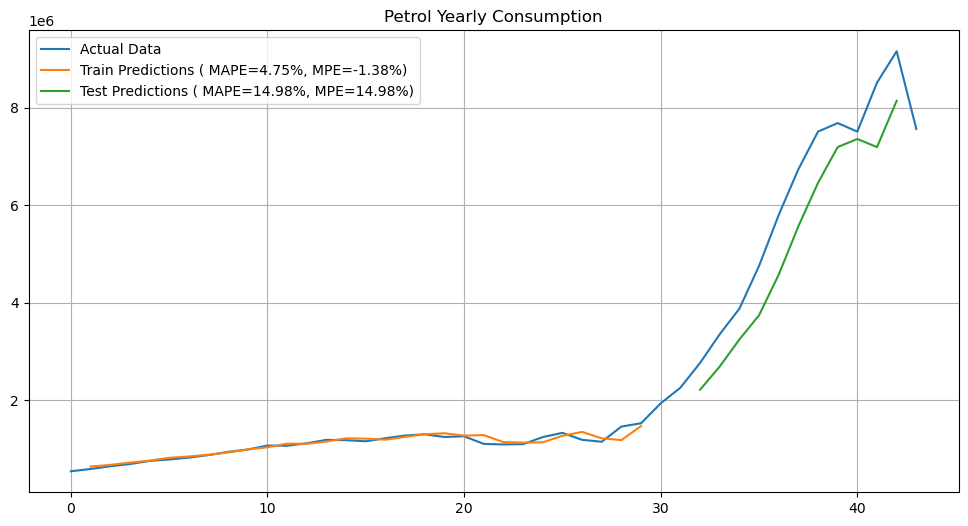

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have trainPredict and testPredict arrays defined
# Calculate MSE and MAE
train_mse = mean_squared_error(scaler.inverse_transform(dataset[look_back:len(trainPredict)+look_back]), trainPredict)
train_mae = mean_absolute_error(scaler.inverse_transform(dataset[look_back:len(trainPredict)+look_back]), trainPredict)

test_mse = mean_squared_error(scaler.inverse_transform(dataset[len(trainPredict)+(look_back*2)+1:len(dataset)-1]), testPredict)
test_mae = mean_absolute_error(scaler.inverse_transform(dataset[len(trainPredict)+(look_back*2)+1:len(dataset)-1]), testPredict)

# Calculate MAPE and MPE for training predictions
train_actual = scaler.inverse_transform(dataset[look_back:len(trainPredict)+look_back])
train_mape = np.mean(np.abs((train_actual - trainPredict) / train_actual)) * 100
train_mpe = np.mean((train_actual - trainPredict) / train_actual) * 100

# Calculate MAPE and MPE for testing predictions
test_actual = scaler.inverse_transform(dataset[len(trainPredict)+(look_back*2)+1:len(dataset)-1])
test_mape = np.mean(np.abs((test_actual - testPredict) / test_actual)) * 100
test_mpe = np.mean((test_actual - testPredict) / test_actual) * 100

# Set the figure size
plt.figure(figsize=(12, 6))

# Create empty plots
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='Actual Data')
plt.plot(trainPredictPlot, label='Train Predictions')
plt.plot(testPredictPlot, label='Test Predictions')
plt.title("Petrol Yearly Consumption")
# Add gridlines
plt.grid(True)

# Add legend with MSE, MAE, MAPE, and MPE
plt.legend([
    'Actual Data',
    f'Train Predictions ( MAPE={train_mape:.2f}%, MPE={train_mpe:.2f}%)',
    f'Test Predictions ( MAPE={test_mape:.2f}%, MPE={test_mpe:.2f}%)'
])


# Show the plot
plt.show()

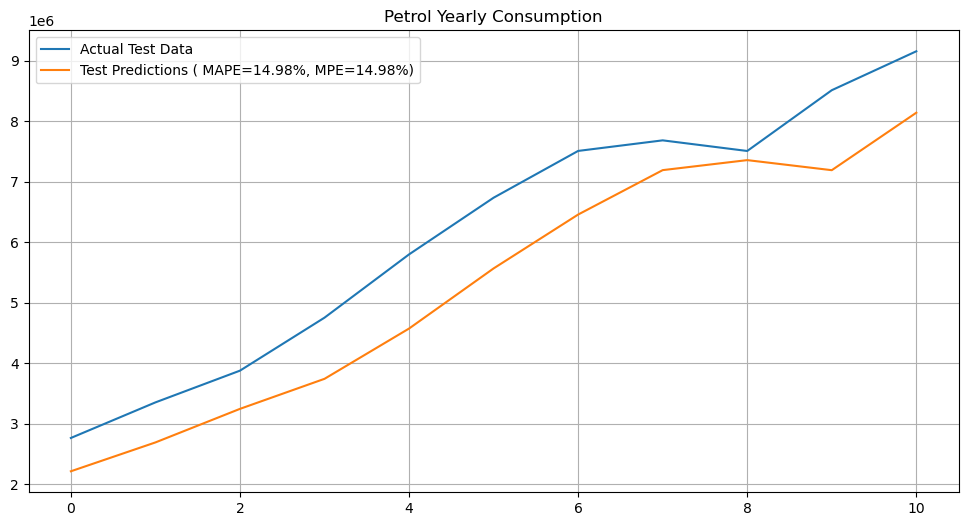

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have testPredict array defined
# Calculate MSE and MAE for testing predictions
test_mse = mean_squared_error(scaler.inverse_transform(dataset[len(trainPredict)+(look_back*2)+1:len(dataset)-1]), testPredict)
test_mae = mean_absolute_error(scaler.inverse_transform(dataset[len(trainPredict)+(look_back*2)+1:len(dataset)-1]), testPredict)

# Calculate MAPE and MPE for testing predictions
test_actual = scaler.inverse_transform(dataset[len(trainPredict)+(look_back*2)+1:len(dataset)-1])
test_mape = np.mean(np.abs((test_actual - testPredict) / test_actual)) * 100
test_mpe = np.mean((test_actual - testPredict) / test_actual) * 100

# Set the figure size
plt.figure(figsize=(12, 6))

# Create empty plots
testPredictPlot = np.empty_like(test_actual)
testPredictPlot[:, :] = np.nan
testPredictPlot[:, :] = testPredict

# Plot actual test data and test predictions
plt.plot(test_actual, label='Actual Test Data')
plt.plot(testPredictPlot, label=f'Test Predictions ( MAPE={test_mape:.2f}%, MPE={test_mpe:.2f}%)')
plt.title("Petrol Yearly Consumption")
# Add gridlines
plt.grid(True)

# Add legend with MSE, MAE, MAPE, and MPE
plt.legend(['Actual Test Data', f'Test Predictions ( MAPE={test_mape:.2f}%, MPE={test_mpe:.2f}%)'])

# Show the plot
plt.show()

1/1 [==============================] - 0s 25ms/step


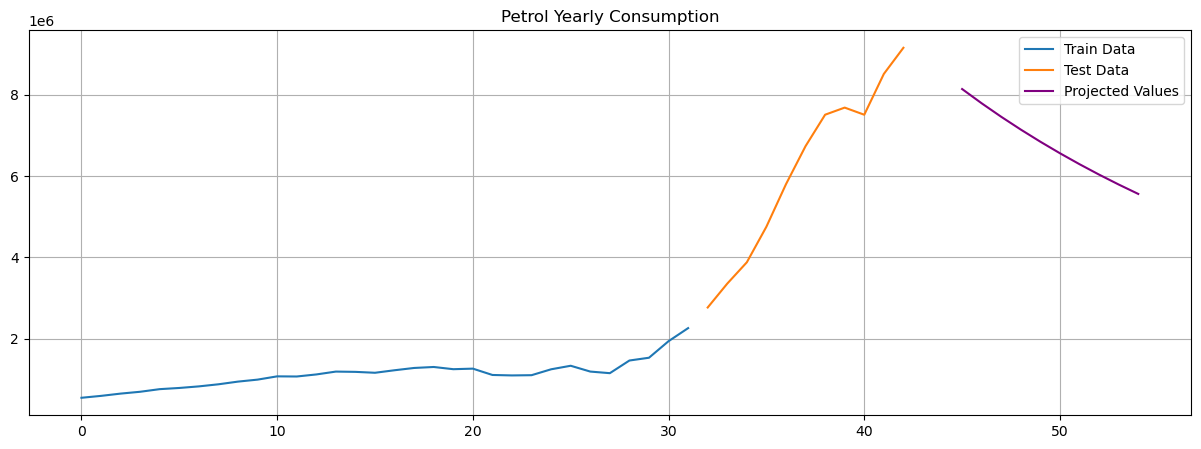

In [20]:
import numpy as np

# Forecast the next 5 values
num_forecast = 10

# Initialize an array to store forecasted values
forecasted_values = []

# Use the last 'look_back' values from the test data to start forecasting
input_sequence = testX[-1].flatten()  # Flatten the input_sequence

for i in range(num_forecast):
    # Reshape input_sequence to match the model's input shape
    input_sequence_reshaped = input_sequence[-look_back:].reshape(1, 1, look_back)
    
    # Predict the next value
    next_value = model.predict(input_sequence_reshaped)
    
    # Append the predicted value to the forecasted_values list
    forecasted_values.append(next_value[0, 0])
    
    # Update the input_sequence by removing the first element and adding the predicted value
    input_sequence = np.append(input_sequence, next_value)

# Inverse transform the forecasted values
forecasted_values = np.array(forecasted_values).reshape(-1, 1)
forecasted_values_first = scaler.inverse_transform(forecasted_values)

# Calculate the starting index for forecasted values based on the number of observations
start_index = len(dataset) + 1

# Create indices for train, test, and forecasted values
train_index = range(train_size + look_back)
test_index = range(train_size + look_back, train_size + len(testPredict) + look_back)
forecast_index = range(start_index, start_index + num_forecast)

# Plot train, test, and forecasted values
plt.figure(figsize=(15, 5))
plt.plot(train_index, scaler.inverse_transform(dataset[:train_size + look_back]), label='Train Data')
plt.plot(test_index, scaler.inverse_transform(dataset[train_size + look_back:train_size + len(testPredict) + look_back]), label='Test Data')
plt.plot(forecast_index, forecasted_values_first, label='Projected Values', linestyle='-', color='purple')
plt.title("Petrol Yearly Consumption")
# Add gridlines
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [21]:
forecasted_values_first

array([[8143156. ],
       [7791771.5],
       [7459354. ],
       [7144395.5],
       [6845588.5],
       [6561860.5],
       [6292277. ],
       [6036032.5],
       [5792417.5],
       [5560800. ]], dtype=float32)

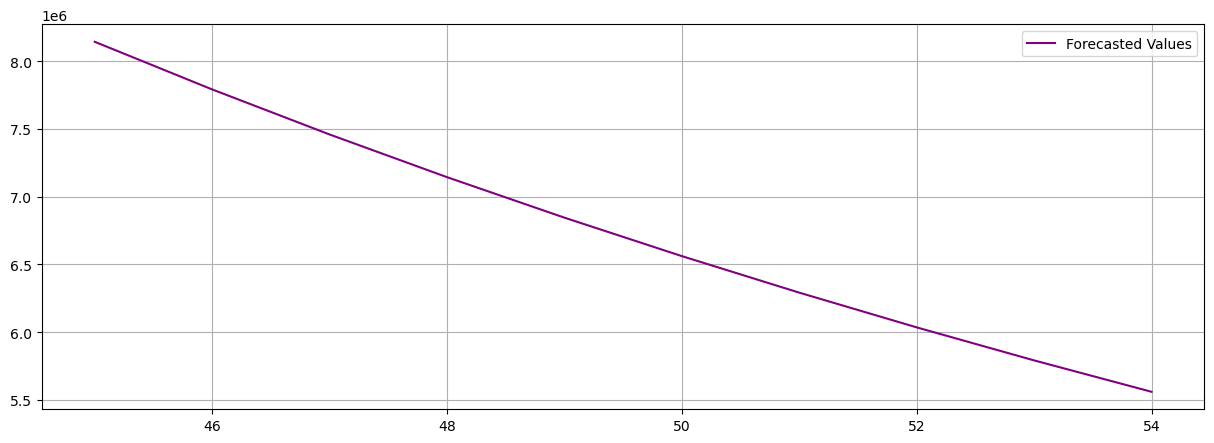

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Plot only forecasted values
plt.figure(figsize=(15, 5))
plt.plot(forecast_index, forecasted_values_first, label='Forecasted Values', linestyle='-', color='purple')

# Add gridlines
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [23]:
import pandas as pd
import numpy as np

# Assuming you have the 'forecasted_values_first' array
forecasted_values_first = np.array([[8235670. ],
       [7968312.5],
       [7712114. ],
       [7466251.5],
       [7229995. ],
       [7002672. ],
       [6783753.5],
       [6572780.5],
       [6369302.5],
       [6172929. ]], dtype=float)

# Create a DataFrame with the 'Projected Yearly Consumption' column
data = pd.DataFrame({'Projected Yearly Consumption': forecasted_values_first.ravel()})

# Print the first few rows of the new dataset
print(data.head(10))

   Projected Yearly Consumption
0                     8235670.0
1                     7968312.5
2                     7712114.0
3                     7466251.5
4                     7229995.0
5                     7002672.0
6                     6783753.5
7                     6572780.5
8                     6369302.5
9                     6172929.0


In [27]:
f1 = dataframe[34:]

# Add 'Forecasted_Values' column to 'f2' and populate it with forecasted values

f1.loc[f1.index[-10:], 'Projected Yearly Consumption'] = data['Projected Yearly Consumption'].values
f1

C:\Users\MoaviaHassan\AppData\Local\Temp\ipykernel_10768\4125369022.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1.loc[f1.index[-10:], 'Projected Yearly Consumption'] = data['Projected Yearly Consumption'].values


,consumption,Projected Yearly Consumption
34,3877984.000,8235670.0
35,4754295.000,7968312.5
36,5800350.000,7712114.0
37,6737560.000,7466251.5
38,7511280.000,7229995.0
39,7685985.000,7002672.0
40,7510363.858,6783753.5
41,8515259.000,6572780.5
42,9158934.000,6369302.5
43,7564345.000,6172929.0


In [28]:
import matplotlib.pyplot as plt

# Calculate MAPE and MPE
mape = ((f1['cosnumption'] - f1['Projected Yearly Consumption']) / f1['consumption']).abs().mean() * 100
mpe = ((f1['cnsumption'] - f1['Projected Yearly Consumption']) / f1['cnsumption']).mean() * 100

# Plot the 'Projected Yearly Consumption' and 'total' series
plt.figure(figsize=(15, 4))
plt.plot(f1.index, f1['Projected Yearly Consumption'], label='Projected Yearly Consumption', linestyle='-')
plt.plot(f1.index, f1['cnsumption'], label='Actual Yearly Consumption', linestyle='-')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Projected vs. Actual Yearly Consumption', fontsize=16)
plt.legend()

# Add MAPE and MPE as text annotations with adjusted positions
mape_x = f1.index[1]  # Adjust the x-coordinate for MAPE
mape_y = f1['cnsumption'].max() - 100  # Adjust the y-coordinate for MAPE
plt.text(mape_x, mape_y, f'MAPE: {mape:.2f}%', fontsize=12, color='red')

mpe_x = f1.index[2]  # Adjust the x-coordinate for MPE
mpe_y = f1['cnsumption'].max() - 1700  # Adjust the y-coordinate for MPE
plt.text(mpe_x, mpe_y, f'MPE: {mpe:.2f}%', fontsize=12, color='blue')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'cosnumption'

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Forecasting for the next 10 years (assuming monthly data)
forecast_steps = 10 * 12  # 10 years * 12 months
look_back = 30  # Adjust according to your existing model
input_sequence = scaled_data[-look_back:]  # Last 'look_back' values of your scaled dataset
forecasted_values = []

for _ in range(forecast_steps):
    input_reshaped = np.reshape(input_sequence, (1, look_back, 1))  # Reshape to fit the model input
    prediction = model.predict(input_reshaped, verbose=0)  # Predict next value
    forecasted_values.append(prediction[0, 0])  # Save the prediction
    input_sequence = np.append(input_sequence[1:], prediction, axis=0)  # Update sequence

# Inverse transform the forecasted values to original scale
forecasted_values = scaler.inverse_transform(np.array(forecasted_values).reshape(-1, 1))

# Generate future dates for plotting
future_dates = pd.date_range(start=dataframe.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Plot historical data and forecasted values
plt.figure(figsize=(15, 6))
plt.plot(dataframe.index, scaler.inverse_transform(scaled_data), label="Historical Data")
plt.plot(future_dates, forecasted_values, label="Forecast")
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption Forecast")
plt.legend()
plt.show()


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 3 dimension(s)

In [ ]:
# Combine historical and forecasted data
combined_df = pd.concat([historical_df, future_df])
combined_df.to_csv('forecasted_data.csv', index=False)


IndexError: tuple index out of range